# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

In [140]:
#print cities for sanity check
#print(cities)

In [125]:
#create a sample response to look at how data is arranged in json
data_to_keep = ['city_name', 'lat', 'long', 'max_temp', 'cloudiness', 'wind_speed', 'humidity', 'country', 'date']
sample_req = requests.get(query_url+"kangaatsiaq").json()
data_to_keep.append(sample_req['name'])
data_to_keep.append(sample_req['coord']['lat'])
data_to_keep.append(sample_req['coord']['lon'])
data_to_keep.append(sample_req['main']['temp_max'])
data_to_keep.append(sample_req['weather'][0]['description'])
data_to_keep.append(sample_req['wind']['speed'])
data_to_keep.append(sample_req['main']['humidity'])
data_to_keep.append(sample_req['sys']['country'])
data_to_keep.append(sample_req['dt'])
print(data_to_keep)


['city_name', 'lat', 'long', 'max_temp', 'cloudiness', 'wind_speed', 'humidity', 'country', 'date', 'Kangaatsiaq', 68.3065, -53.4641, -3.51, 'overcast clouds', 2.54, 79, 'GL', 1619241026]


In [112]:
sample_req = requests.get(query_url+"kangaatsiaq").json()
print(sample_req)

{'coord': {'lon': -53.4641, 'lat': 68.3065}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.51, 'feels_like': -7.23, 'temp_min': -3.51, 'temp_max': -3.51, 'pressure': 1019, 'humidity': 79, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 2.54, 'deg': 88, 'gust': 2.52}, 'clouds': {'all': 100}, 'dt': 1619240850, 'sys': {'country': 'GL', 'sunrise': 1619247517, 'sunset': 1619309096}, 'timezone': -7200, 'id': 3422683, 'name': 'Kangaatsiaq', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [137]:
#million+1 th attempt
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#loop set up
city_name = []
lat = []
lon = []
max_temp = []
cloudiness = []
wind_speed = []
humidity = []
country = []
date = []

for city in cities:
    try:
        keep_response = requests.get(query_url + city).json()
        city_name.append(keep_response['name'])
        lat.append(keep_response['coord']['lat'])
        lon.append(keep_response['coord']['lon'])
        max_temp.append(keep_response['main']['temp_max'])
        cloudiness.append(keep_response['weather'][0]['description'])
        wind_speed.append(keep_response['wind']['speed'])
        humidity.append(keep_response['main']['humidity'])
        country.append(keep_response['sys']['country'])
        date.append(keep_response['dt'])
        print(f'processing record for: {city}')
    
    except KeyError:
        print('records missing for {city} skipping...')

print('done')
print(len(city_names))
print(len(lat))
print(len(lon))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date))

records missing for {city} skipping...
processing record for: butaritari
processing record for: pochutla
processing record for: luanda
processing record for: maryville
records missing for {city} skipping...
processing record for: jamestown
processing record for: hermanus
processing record for: vaini
processing record for: airai
records missing for {city} skipping...
records missing for {city} skipping...
processing record for: rikitea
processing record for: dikson
processing record for: ribeira grande
processing record for: atuona
processing record for: nikolskoye
processing record for: georgetown
processing record for: cockburn town
processing record for: klaksvik
processing record for: cape town
processing record for: clyde river
processing record for: yagodnoye
processing record for: iskateley
processing record for: naze
processing record for: punta arenas
processing record for: qaanaaq
processing record for: ushuaia
processing record for: arraial do cabo
processing record for: tizn

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:

weather_dict = {
    "city": city_name,
    "latitude": lat,
    "longitude": lon,
    "max_temperature": max_temp,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "humidity": humidity,
    "country": country,
    "date": date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('cities.csv')
weather_df.head()


,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
0,Butaritari,3.0707,172.7902,28.03,light rain,3.56,74,KI,1619243360
1,Pochutla,15.7432,-96.4661,26.67,overcast clouds,0.45,84,MX,1619243360
2,Luanda,-8.8368,13.2343,24.00,broken clouds,1.03,94,AO,1619243093
3,Maryville,35.7565,-83.9705,9.44,overcast clouds,2.06,76,US,1619243361
4,Jamestown,42.0970,-79.2353,7.00,clear sky,3.60,53,US,1619243362


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [148]:
high_humidity = weather_df['humidity'] >= 101
print(high_humidity.value_counts())

False    540
Name: humidity, dtype: int64


In [69]:
#  Get the indices of cities that have humidity over 100%.


In [70]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

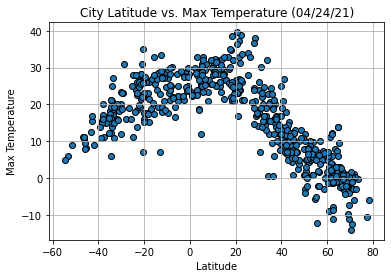

In [162]:
plt.scatter(weather_df['latitude'], weather_df['max_temperature'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

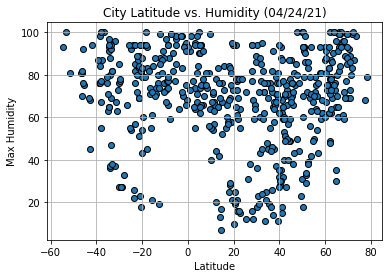

In [163]:
plt.scatter(weather_df['latitude'], weather_df['humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

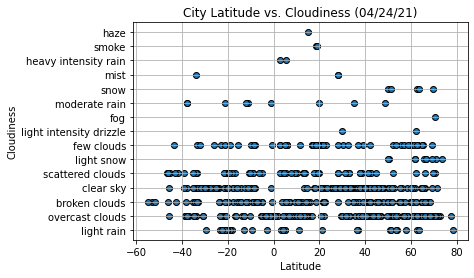

In [164]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

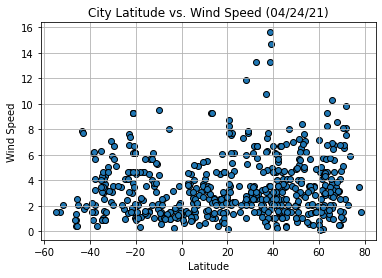

In [165]:
plt.scatter(weather_df['latitude'], weather_df['wind_speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()

## Linear Regression

In [ ]:
#split the data up by latitude
northern_hem = weather_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression